In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows=5
import jieba

In [2]:
df=pd.read_json('./dataset/News_Category_Dataset_v2.json',lines=True)
df=df.dropna()
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
print('总的新闻条目：%s'%df.shape[0])

总的新闻条目：200853


In [4]:
print('总的新闻类别:%s' %len(set(df['category'].values.tolist())))

总的新闻类别:41


In [5]:
categorys=list(set(df['category'].values.tolist()))
category_df=pd.DataFrame(categorys)
category_df

,0
0,GOOD NEWS
1,ENVIRONMENT
...,...
39,EDUCATION
40,ARTS


- 统计各个类别的分布情况

In [6]:
caregorys_num=[]
for i in categorys:
    caregorys_num.append(df[df['category']==i].shape[0])
pd.DataFrame([categorys,caregorys_num])

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,GOOD NEWS,ENVIRONMENT,MONEY,POLITICS,HEALTHY LIVING,COMEDY,BUSINESS,WORLD NEWS,SCIENCE,TECH,...,TRAVEL,PARENTING,DIVORCE,STYLE,ENTERTAINMENT,CRIME,QUEER VOICES,COLLEGE,EDUCATION,ARTS
1,1398,1323,1707,32739,6694,5175,5937,2177,2178,2082,...,9887,8677,3426,2254,16058,3405,6314,1144,1004,1509


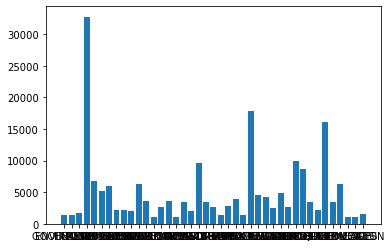

In [7]:
plt.bar(categorys,caregorys_num)
plt.show()

- 分词

In [8]:
def not_empty(s):
    return s and s.strip()

In [9]:
cw=lambda x:list(filter(not_empty,list(jieba.cut(x))))
df['content_cw']=df['short_description'].apply(cw)
df['content_cw']

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\syf19\AppData\Local\Temp\jieba.cache
Loading model cost 0.523 seconds.
Prefix dict has been built successfully.


0         [She, left, her, husband, ., He, killed, their...
1                         [Of, course, it, has, a, song, .]
                                ...                        
200851    [CORRECTION, :, An, earlier, version, of, this...
200852    [The, five, -, time, all, -, star, center, tor...
Name: content_cw, Length: 200853, dtype: object

In [10]:
content_cw=pd.DataFrame(df['content_cw'])
content_cw.head()

,content_cw
0,"[She, left, her, husband, ., He, killed, their..."
1,"[Of, course, it, has, a, song, .]"
2,"[The, actor, and, his, longtime, girlfriend, A..."
3,"[The, actor, gives, Dems, an, ass, -, kicking,..."
4,"[The, "", Dietland, "", actress, said, using, th..."


In [30]:
import jieba.analyse
index = 2400
print(df['content_cw'][index])

['The', 'senator', 'then', 'urged', 'the', 'Facebook', 'CEO', 'to', '“', 'go', 'back', 'home', 'and', 'rewrite', 'it', '.', '”']


- 提取关键词

In [34]:
print(jieba.analyse.extract_tags((" ".join(df['content_cw'][index])),topK=5,withWeight=False))

['senator', 'urged', 'Facebook', 'CEO', 'go']


- 类别映射

In [9]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['content_cw'])
vocab=tokenizer.word_index
vocab

Using TensorFlow backend.


{' ': 1,
 '.': 2,
 'the': 3,
 ',': 4,
 'to': 5,
 'a': 6,
 'of': 7,
 'and': 8,
 "'": 9,
 'in': 10,
 '"': 11,
 's': 12,
 'is': 13,
 'that': 14,
 'it': 15,
 'i': 16,
 'you': 17,
 '-': 18,
 'for': 19,
 'on': 20,
 'we': 21,
 'with': 22,
 'are': 23,
 'be': 24,
 'this': 25,
 'as': 26,
 'have': 27,
 't': 28,
 'but': 29,
 '?': 30,
 'was': 31,
 'your': 32,
 'not': 33,
 'at': 34,
 'from': 35,
 'can': 36,
 'my': 37,
 'or': 38,
 'an': 39,
 'our': 40,
 'about': 41,
 'what': 42,
 'more': 43,
 'has': 44,
 'they': 45,
 'one': 46,
 'by': 47,
 'all': 48,
 '’': 49,
 '--': 50,
 'when': 51,
 'their': 52,
 'he': 53,
 ':': 54,
 'out': 55,
 'will': 56,
 'who': 57,
 'if': 58,
 'there': 59,
 'new': 60,
 'his': 61,
 'up': 62,
 'time': 63,
 'so': 64,
 'just': 65,
 'do': 66,
 'people': 67,
 'like': 68,
 'her': 69,
 'how': 70,
 'some': 71,
 're': 72,
 'been': 73,
 '!': 74,
 'no': 75,
 'us': 76,
 'than': 77,
 '(': 78,
 'she': 79,
 'year': 80,
 'most': 81,
 'me': 82,
 'life': 83,
 'day': 84,
 'said': 85,
 'get': 86,
 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['content_cw'], df['category'], test_size=0.1)

In [14]:
print('Number of rows in the total set:{}'.format(df.shape[0]))
print('Number of rows in the training set:{}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set:200853
Number of rows in the training set:180767
Number of rows in the test set: 20086


In [15]:
from keras.preprocessing.sequence import pad_sequences
x_train_word_ids=tokenizer.texts_to_sequences(x_train)
x_test_word_ids = tokenizer.texts_to_sequences(x_test)

In [16]:
x_train_padded_seqs=pad_sequences(x_train_word_ids,maxlen=50) 
x_test_padded_seqs=pad_sequences(x_test_word_ids, maxlen=50)
x_test_padded_seqs

array([[   0,    0,    0, ...,    1, 1190,    2],
       [   1,  374,    1, ...,  273,    1,   27],
       [   1,  155,    2, ...,    1, 3309,    2],
       ...,
       [   0,    0,    0, ...,    1, 4020,    2],
       [   0,    0,    0, ...,    6,    1,  228],
       [   0,    0,    0, ...,    1, 5588,   74]])

In [17]:
x_train_word = pd.DataFrame(x_train_padded_seqs)
x_train_word

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,12,1,4773,1,31,1,1883,1,937,2
1,0,0,0,0,0,0,0,0,0,0,...,1,6329,1,849,4,1,357,1,85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180765,0,0,0,0,0,0,0,0,0,0,...,7,1,3,1,464,9,12,1,17168,2
180766,0,0,0,0,0,0,0,0,0,0,...,24,1,29900,1,10,1,373,1,3221,2


In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

NameError: name 'training_data' is not defined